#### 机器学习分类

* 根据标签分为：
    * 监督学习：数据的所有标签都知道
    * 半监督学习：知道一部分数据的标签
    * 无监督学习：不知道标签
    * 强化学习：对好的结果给予激励，对不好的结果给予惩罚，不断调整模型。

* 根据不同协议分为：
    * Batch学习：数据的输入是一批的。
    * 在线学习：数据是实时更新，不断优化模型。
    * 主动学习：具备主动问问题的能力。

#### 输入数据分类

* concrete features：具体特征
* raw features：如图像像素
* abstract features：抽象特征

#### 机器学习必须满足的条件

* 假设空间H的size M是有限的，即当N足够大的时候，那么对于假设空间中任意一个假设g，$E_{in}=E_{out}$。
* 利用算法A从假设空间H中，挑选一个g，$E_{in}(g)=0, E_{out}=0$。

#### 误差

* 在训练集上的叫做训练（经验）误差，新样本上叫做泛化误差。

* 过拟合是无法避免的，只能缓解或者减小风险。

* 数据集划分方法：留出法，交叉验证法，自助法。

* 评价指标：错误率，精度，查全率，查准率，F1
$$
F1 = \frac{2\cdot TP}{样本总数+TP-TN}
$$

* ROC曲线横轴是假正例率，纵轴是真正例率。若一个学习器的ROC曲线被另一个学习器的曲线完全包住，则可断言后者的性能优于前者。ROC曲线下的面积称为AUC。

* 偏差；度量学习算法的期望预测与真实结果的偏离程度，刻画了学习算法本身的拟合能力；
* 方差：度量同样大小的训练集的变动所导致的学习性能的变化，刻画了数据扰动所造成的影响；
* 噪声：表达了在当前任务上任何学习算法所能达到的期望泛化误差的下界，刻画了学习问题本身的难度。

##### sigmoid函数

$$
y = \frac{1}{1+e^{-z}}
$$

#### 对数几率回归

$$
y = \frac{1}{1+e^{-(w^Tx+b)}}
$$

* 使用对数函数来代替阶跃函数

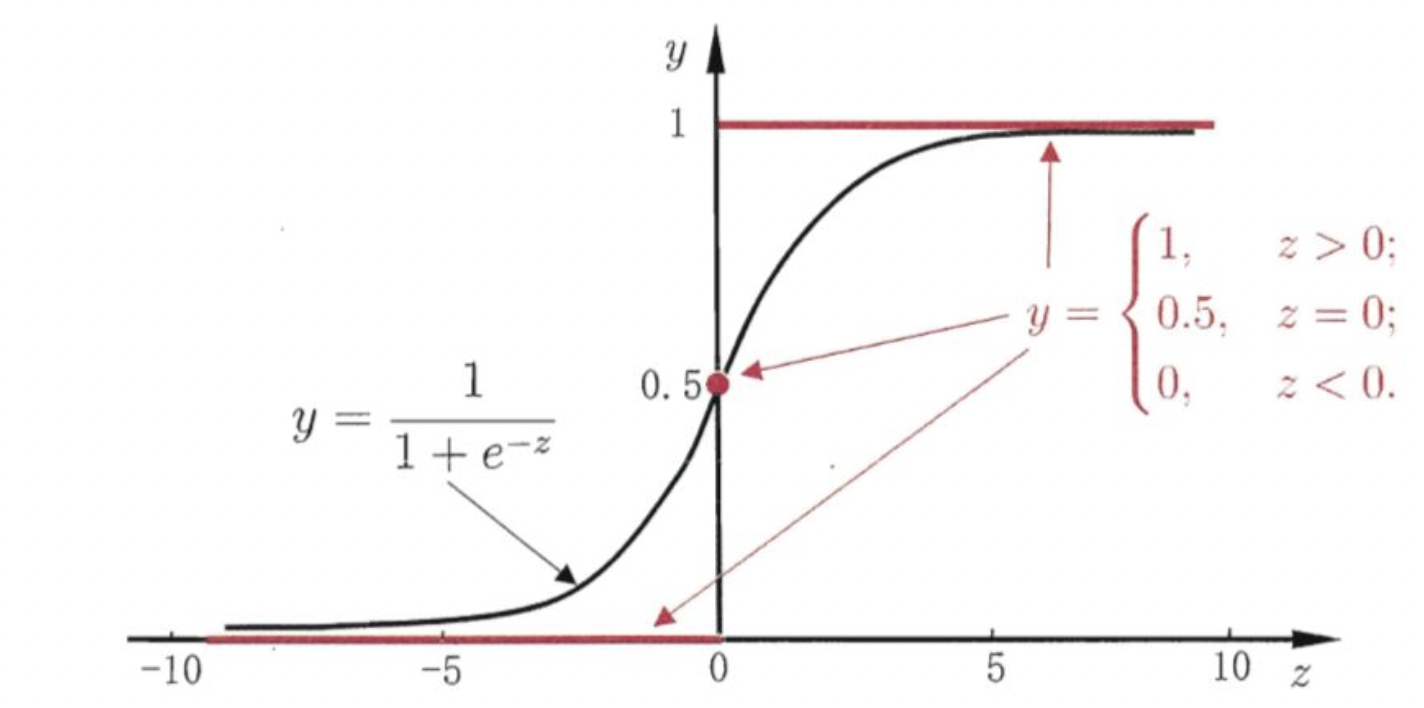

##### 多分类学习

* 将多分类拆分为多个二分类，拆解方式有：
    * 一对一：两两组合，将其中一个类看作是正类，一个类看作负类，多个分类器的结果进行组合，需要训练$N(N-1)/2$个分类器。
    * 一对多：一个类看作正类，其余类看作负类，需要训练N个分类器。
    * 多对多：每次将若干个类作为正类，若干个类作为负类。

##### 类别不平衡
* 在类别不平衡时，有三类做法：
    * 对反类样例进行欠采样，去除一些反样例，使得正反样例接近。
    * 对正类样例进行过采样，增加一些正样例，使它们接近。
    * 直接基于原始训练集进行学习，但是用训练好的分类器进行预测时，将$\frac{y}{1-y} \cdot \frac{m^-}{m^+}$嵌入到决策过程中，称为阈值移动。

#### 决策树

* 决策树的生成是一个递归的过程，有三种情况会导致递归返回：
    * 当前节点包含的样本全属于同一类别，无需划分；
    * 当前属性集为空，或所有样本在所有属性上取值相同，无法划分；
    * 当前结点包含的样本集合为空，不能划分。

* 划分选择：
    * 信息熵是度量样本集合纯度最常用的指标。$Ent(D) = -\sum_{k=1}^{|y|}p_k log_2p_k$，$Ent(D)$值越小，D的纯度越高。
    * 信息增益$Gain(D,a) = Ent(D) - \sum_{v=1}^{V}\frac{|D^v|}{|D|}Ent(D^v)$，信息增益越大，意味着使用属性a来进行划分所获得的纯度提升最大。
    * 增益率：$Gain_ratio(D, a)=\frac{Gain(D,a)}{IV(a)}$，其中$IV(a)=-\sum_{v=1}^{V}\frac{|D^v|}{|D|}log_2 \frac{|D^v|}{|D|}$选择最优划分属性。属性a的可能取值（V）数目越多，则IV的值就越大。
    * 基尼指数：$Gini\_index(D,a)=\sum_{v=1}^{V}\frac{|D^v|}{|D|}Gini(D^v)$，基尼指数越小，D的纯度越高。

* **ID3**采用信息增益进行属性划分。
* **C4.5**先从候选划分属性中找出信息增益高于平均水平的属性，再从中选择增益率增益率最高的进行属性划分。
* **CART决策树**使用基尼指数选择划分属性。

* 剪枝处理
    * 决策树剪枝的基本策略有“预剪枝”和“后剪枝”。
        * 预剪枝：在决策树生成过程中，对每个结点在划前先进行估计，若当前结点的划分不能带来决策树泛化性能的提升，则停止划分并将当前结点标记为叶结点；
        * 后剪枝：先从训练集生成一棵完整的决策树，然后自底向上地对非叶结点进行考察，若将该结点对应的子树替换为叶结点能带来决策树泛化性能提升，则将该子树替换为叶结点。